# **ANALISIS DE PRESTAMOS PERSONALES A TRAVES DE MODELOS DE MACHINE LEARNING**

### **1. Carga de librerias y base de datos:**

In [417]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, f1_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [418]:
df = pd.read_csv('prestamos.csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


### **2. Exploración:**

In [419]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    346 non-null    int64 
 1   Unnamed: 0      346 non-null    int64 
 2   loan_status     346 non-null    object
 3   Principal       346 non-null    int64 
 4   terms           346 non-null    int64 
 5   effective_date  346 non-null    object
 6   due_date        346 non-null    object
 7   age             346 non-null    int64 
 8   education       346 non-null    object
 9   Gender          346 non-null    object
dtypes: int64(5), object(5)
memory usage: 27.2+ KB
None
       Unnamed: 0.1  Unnamed: 0    Principal       terms         age
count    346.000000  346.000000   346.000000  346.000000  346.000000
mean     202.167630  202.167630   943.641618   22.653179   30.939306
std      115.459715  115.459715   109.425530    7.991006    6.039418
min        0.000000    0.000000   3

In [420]:
df['loan_status'].value_counts()

,count
loan_status,
PAIDOFF,260
COLLECTION,86


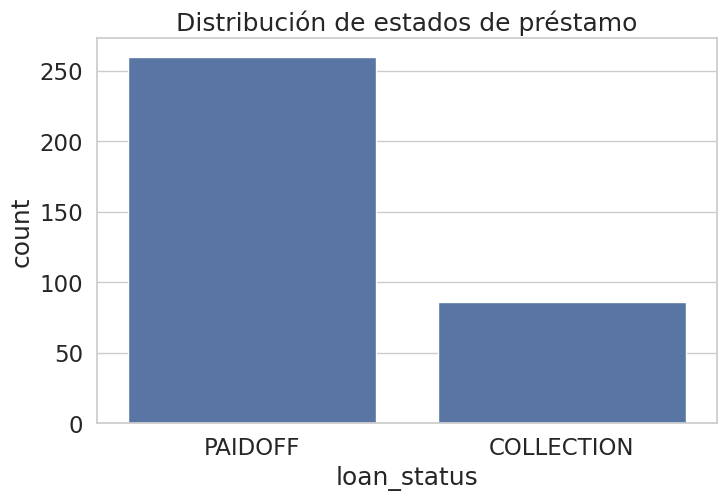

In [421]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='loan_status')
plt.title('Distribución de estados de préstamo')
plt.show()

In [422]:
Principal_counts= df["Principal"].value_counts().sort_values(ascending=False)
Principal_counts

,count
Principal,
1000,258
800,81
300,3
900,2
500,2


In [423]:
df['effective_date'] = pd.to_datetime(df['effective_date'])
df['due_date'] = pd.to_datetime(df['due_date'])
df['loan_duration'] = (df['due_date'] - df['effective_date']).dt.days

In [424]:
education_counts= df["education"].value_counts().sort_values(ascending=False)
education_counts

,count
education,
High School or Below,151
college,149
Bechalor,44
Master or Above,2


In [425]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: proportion, dtype: float64

In [426]:
df.groupby(['education'])['Gender'].value_counts(normalize=True)

education             Gender
Bechalor              male      0.772727
                      female    0.227273
High School or Below  male      0.867550
                      female    0.132450
Master or Above       male      1.000000
college               male      0.852349
                      female    0.147651
Name: proportion, dtype: float64

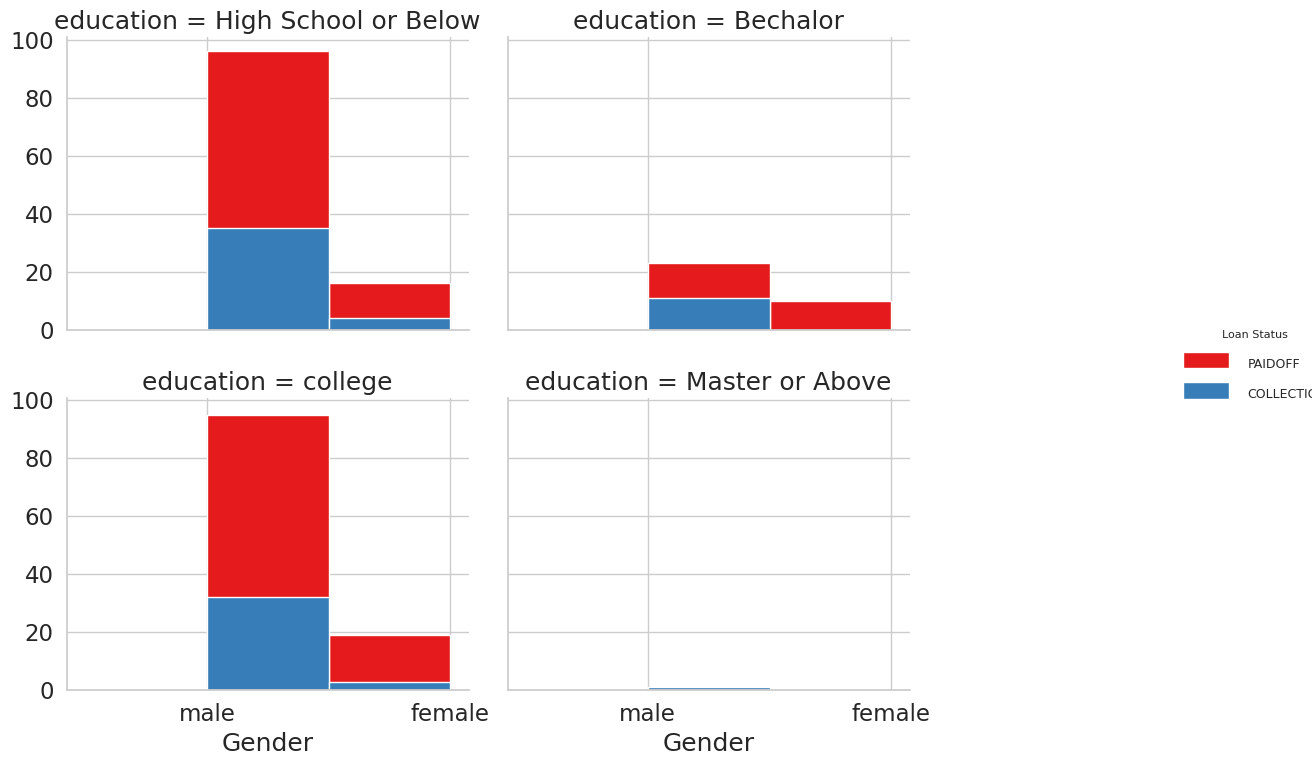

In [427]:
bins = 2
# Aumentamos el tamaño total de cada gráfico
g = sns.FacetGrid(df, col="education", hue="loan_status", palette="Set1", col_wrap=2, height=4, aspect=1.4)
g.map(plt.hist, 'Gender', bins=bins, ec="k")

# Agregar leyenda y moverla a la derecha del gráfico, sin que se corte
g.add_legend(title="Loan Status")

# Ajustar espacio lateral para la leyenda
plt.subplots_adjust(right=0.7)  # Reservar más espacio en la figura general
g._legend.set_bbox_to_anchor((1, 0.5))  # Ubicar la leyenda fuera, bien visible

# Ajustar fuentes para que se vean bien
g._legend.get_title().set_fontsize(8)
for text in g._legend.get_texts():
    text.set_fontsize(9)

plt.show()



#### **Análisis de valores nulos:**

In [428]:
df.isnull().sum()

,0
Unnamed: 0.1,0
Unnamed: 0,0
loan_status,0
Principal,0
terms,0
effective_date,0
due_date,0
age,0
education,0
Gender,0


#### **Transformación de variable target:**

In [429]:
# PAIDOFF=1, COLLECTION=0
le = LabelEncoder()
df['loan_status_encoded'] = le.fit_transform(df['loan_status'])

#### **Distribución de variables:**

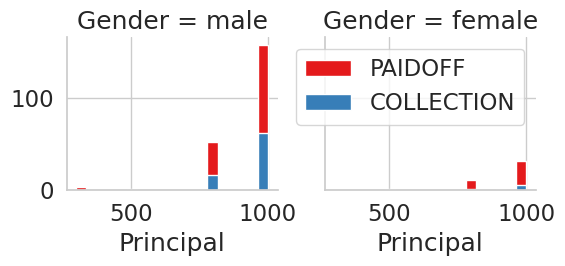

In [430]:
bins = np.linspace(df.Principal.min(), df.Principal.max(), 20)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

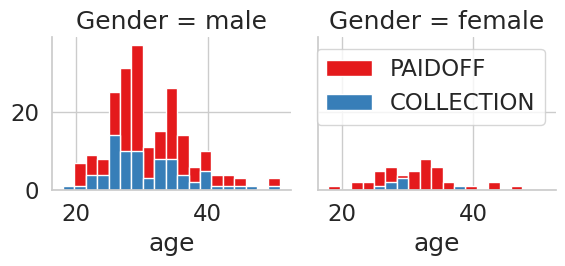

In [431]:
bins = np.linspace(df.age.min(), df.age.max(), 20)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

In [432]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: proportion, dtype: float64

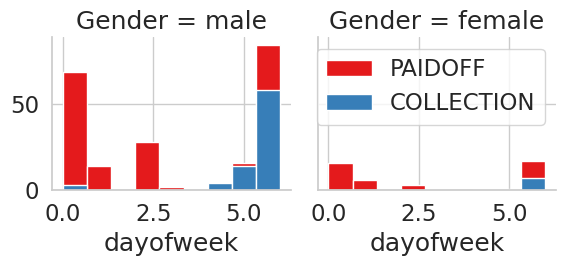

In [433]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

In [434]:
df.groupby(['dayofweek'])['loan_status'].value_counts(normalize=True)

dayofweek  loan_status
0          PAIDOFF        0.965517
           COLLECTION     0.034483
1          PAIDOFF        1.000000
2          PAIDOFF        1.000000
3          PAIDOFF        1.000000
4          COLLECTION     0.500000
           PAIDOFF        0.500000
5          PAIDOFF        0.548387
           COLLECTION     0.451613
6          PAIDOFF        0.608434
           COLLECTION     0.391566
Name: proportion, dtype: float64

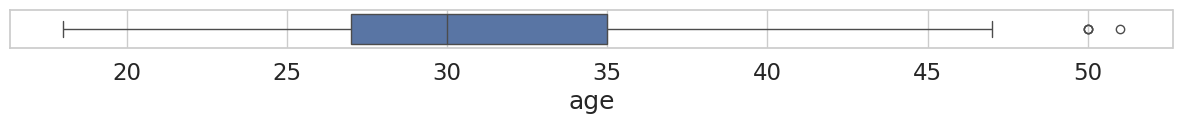

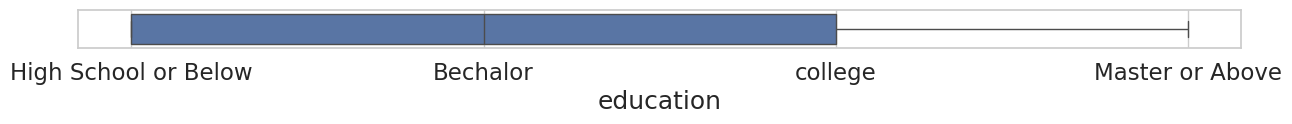

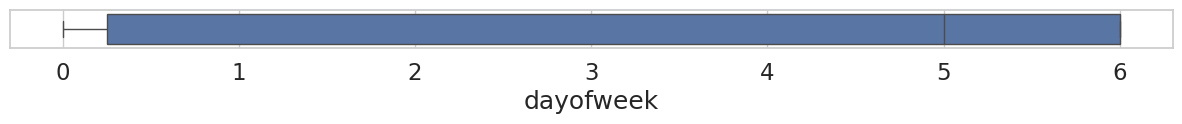

In [435]:
cols = ['age', 'education','dayofweek']
sns.set(rc={'figure.figsize':(15,0.5)}, font_scale=1.5, style='whitegrid')
for item in cols:
    sns.boxplot(x = df[item], )
    plt.show()

In [436]:
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,loan_duration,loan_status_encoded,dayofweek
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,29,1,3
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,29,1,3
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,14,1,3
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,29,1,4
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,29,1,4


### **3. Tratamiento de datos:**

#### **Análisis de correlaciones:**

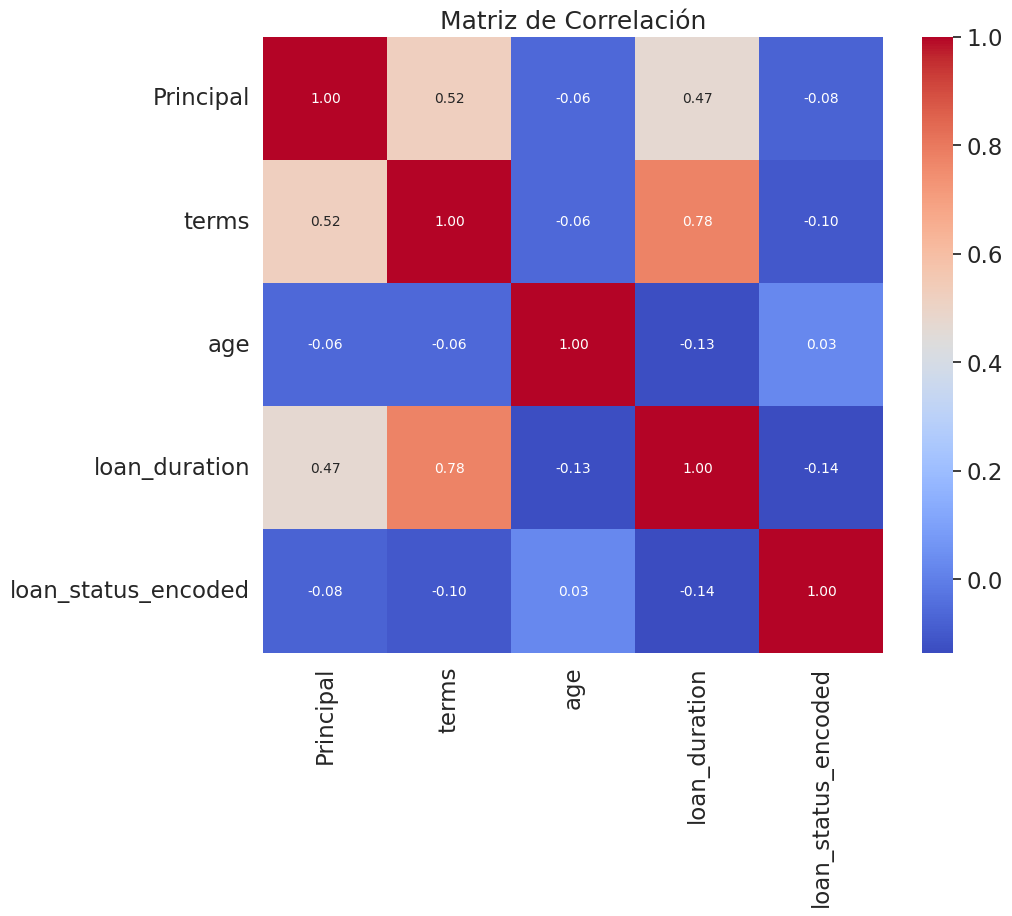

In [437]:
plt.figure(figsize=(10, 8))
corr = df[['Principal', 'terms', 'age', 'loan_duration', 'loan_status_encoded']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Matriz de Correlación')
plt.show()

In [438]:
import pandas as pd
correlation_matrix = df.corr(numeric_only=True)
cor_target = correlation_matrix["loan_status_encoded"]
cor_target_sorted = cor_target.abs().sort_values(ascending=False)
correlation_df = pd.DataFrame({
    "Variable": cor_target_sorted.index,
    "Correlación": cor_target.loc[cor_target_sorted.index]
})

correlation_df = correlation_df[correlation_df["Variable"] != "loan_status_encoded"]
print(correlation_df)


                    Variable  Correlación
Unnamed: 0.1    Unnamed: 0.1    -0.748699
Unnamed: 0        Unnamed: 0    -0.748699
dayofweek          dayofweek    -0.408097
loan_duration  loan_duration    -0.135758
terms                  terms    -0.102102
Principal          Principal    -0.076309
age                      age     0.027479


In [439]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,male,High School or Below
1,1000,30,33,female,Bechalor
2,1000,15,27,male,college
3,1000,30,28,female,college
4,1000,30,29,male,college


#### **Conversión de variables categóricas a dummies y eliminación de la multicolinealidad:**

In [440]:
df = pd.get_dummies(df, columns=['education'], drop_first=True)
df = pd.get_dummies(df, columns=['Gender'], drop_first=True)
df = pd.get_dummies(df, columns=['dayofweek'], drop_first=True)

#### **Selección de variables de interes para el modelado:**

In [441]:
Feature = ['Principal', 'terms', 'loan_duration'] + \
          [col for col in df.columns if 'education_' in col or 'Gender_' in col or 'dayofweek_' in col]
X = df[Feature]
y= df['loan_status_encoded']

In [442]:
X.head()

,Principal,terms,loan_duration,education_High School or Below,education_Master or Above,education_college,Gender_male,dayofweek_1,dayofweek_2,dayofweek_3,dayofweek_4,dayofweek_5,dayofweek_6
0,1000,30,29,True,False,False,True,False,False,True,False,False,False
1,1000,30,29,False,False,False,False,False,False,True,False,False,False
2,1000,15,14,False,False,True,True,False,False,True,False,False,False
3,1000,30,29,False,False,True,False,False,False,False,True,False,False
4,1000,30,29,False,False,True,True,False,False,False,True,False,False


### **4. Estandarización y entrenamiento de distintos modelos de Machine Learning:**

In [443]:
#Para KNN, SVM y Regresion logística se utilizan datos escalados: X_train_scaled y X_test_scaled
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [444]:
resultados = {}
resultados_auc = {}

#### *Random Forest*

In [445]:
param_grid_rf = {'n_estimators': [50, 100, 200], 'max_depth': [None, 5, 10]}
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='f1')
grid_rf.fit(X_train, y_train)
model_rf = grid_rf.best_estimator_
y_pred_rf = model_rf.predict(X_test)
y_probs_rf = model_rf.predict_proba(X_test)[:, 1]
resultados['Random Forest'] = f1_score(y_test, y_pred_rf)
resultados_auc['Random Forest'] = roc_auc_score(y_test, y_probs_rf)

#### *K Vecinos (KNN)*

In [446]:
param_grid = {'n_neighbors': range(1, 21)}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='f1')
grid.fit(X_train_scaled, y_train)

best_k = grid.best_params_['n_neighbors']
print("Mejor valor de k (según F1-score):", best_k)

Mejor valor de k (según F1-score): 20


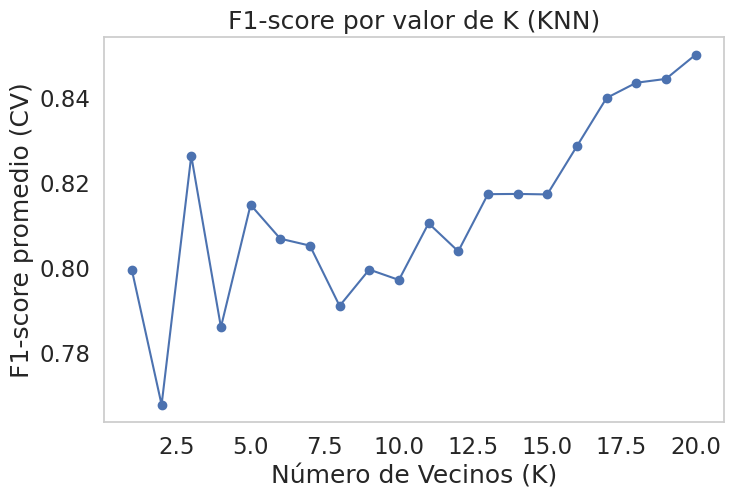

In [447]:
mean_f1_scores = grid.cv_results_['mean_test_score']
plt.figure(figsize=(8, 5))
plt.plot(range(1, 21), mean_f1_scores, marker='o')
plt.xlabel('Número de Vecinos (K)')
plt.ylabel('F1-score promedio (CV)')
plt.title('F1-score por valor de K (KNN)')
plt.grid()
plt.show()

In [448]:
model_knn = KNeighborsClassifier(n_neighbors=best_k)
model_knn.fit(X_train_scaled, y_train)
y_pred_knn = model_knn.predict(X_test_scaled)
y_probs_knn = model_knn.predict_proba(X_test_scaled)[:, 1]
resultados['KNN'] = f1_score(y_test, y_pred_knn)
resultados_auc['KNN'] = roc_auc_score(y_test, y_probs_knn)

#### *Máquina de Soporte Vectorial (SVM)*

In [449]:
param_grid_svm = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly', 'sigmoid']}
grid_svm = GridSearchCV(SVC(probability=True), param_grid_svm, cv=5, scoring='f1')
grid_svm.fit(X_train_scaled, y_train)
model_svm = grid_svm.best_estimator_
y_pred_svm = model_svm.predict(X_test_scaled)
y_probs_svm = model_svm.predict_proba(X_test_scaled)[:, 1]
resultados['SVM'] = f1_score(y_test, y_pred_svm)
resultados_auc['SVM'] = roc_auc_score(y_test, y_probs_svm)

#### *Árbol de decisión*

In [450]:
param_grid_dt = {'max_depth': [None, 5, 10, 20]}
grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=5, scoring='f1')
grid_dt.fit(X_train, y_train)
model_dt = grid_dt.best_estimator_
y_pred_dt = model_dt.predict(X_test)
y_probs_dt = model_dt.predict_proba(X_test)[:, 1]
resultados['Decision Tree'] = f1_score(y_test, y_pred_dt)
resultados_auc['Decision Tree'] = roc_auc_score(y_test, y_probs_dt)


#### *Regresión Logística*

In [451]:
param_grid_lr = {'C': [0.01, 0.1, 1, 10]}
grid_lr = GridSearchCV(LogisticRegression(max_iter=1000, class_weight='balanced'), param_grid_lr, cv=5, scoring='f1')
grid_lr.fit(X_train_scaled, y_train)
model_lr = grid_lr.best_estimator_
y_pred_lr = model_lr.predict(X_test_scaled)
y_probs_lr = model_lr.predict_proba(X_test_scaled)[:, 1]
resultados['Logistic Regression'] = f1_score(y_test, y_pred_lr)
resultados_auc['Logistic Regression'] = roc_auc_score(y_test, y_probs_lr)

In [452]:
print("\nClassification Report - Regresión Logística:")
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Classification Report - Regresión Logística:
[[10  4]
 [25 31]]
              precision    recall  f1-score   support

           0       0.29      0.71      0.41        14
           1       0.89      0.55      0.68        56

    accuracy                           0.59        70
   macro avg       0.59      0.63      0.54        70
weighted avg       0.77      0.59      0.63        70



#### **Análisis de modelos: F1 score y curva ROC**

In [453]:
print("\nF1-Scores por modelo:")
for modelo, score in resultados.items():
    print(f"{modelo}: {score:.4f}")

print("\nAUC Scores por modelo:")
for modelo, auc_score in resultados_auc.items():
    print(f"{modelo}: {auc_score:.4f}")


F1-Scores por modelo:
Random Forest: 0.8889
KNN: 0.8142
SVM: 0.8525
Decision Tree: 0.8000
Logistic Regression: 0.6813

AUC Scores por modelo:
Random Forest: 0.6422
KNN: 0.6480
SVM: 0.6231
Decision Tree: 0.6703
Logistic Regression: 0.6167


In [454]:
df_resultados = pd.DataFrame({
    'Modelo': list(resultados.keys()),
    'F1-Score': list(resultados.values()),
    'AUC': [resultados_auc[m] for m in resultados.keys()]
})
print("\nResumen comparativo de modelos:")
print(df_resultados.sort_values(by='F1-Score', ascending=False))



Resumen comparativo de modelos:
                Modelo  F1-Score       AUC
0        Random Forest  0.888889  0.642219
2                  SVM  0.852459  0.623087
1                  KNN  0.814159  0.647959
3        Decision Tree  0.800000  0.670281
4  Logistic Regression  0.681319  0.616709


In [455]:
mejor_modelo_nombre = max(resultados, key=resultados_auc.get)
mejor_modelo = {
    'Random Forest': model_rf,
    'KNN': model_knn,
    'SVM': model_svm,
    'Decision Tree': model_dt,
    'Logistic Regression': model_lr
}[mejor_modelo_nombre]

print(f"\nModelo con mejor desempeño en la curva ROC: {mejor_modelo_nombre}")


Modelo con mejor desempeño en la curva ROC: Decision Tree


In [456]:
# Curva ROC
y_probs = resultados_auc[mejor_modelo_nombre]
y_probs_final = {
    'Random Forest': y_probs_rf,
    'KNN': y_probs_knn,
    'SVM': y_probs_svm,
    'Decision Tree': y_probs_dt,
    'Logistic Regression': y_probs_lr
}[mejor_modelo_nombre]
fpr, tpr, thresholds = roc_curve(y_test, y_probs_final)
roc_auc = roc_auc_score(y_test, y_probs_final)

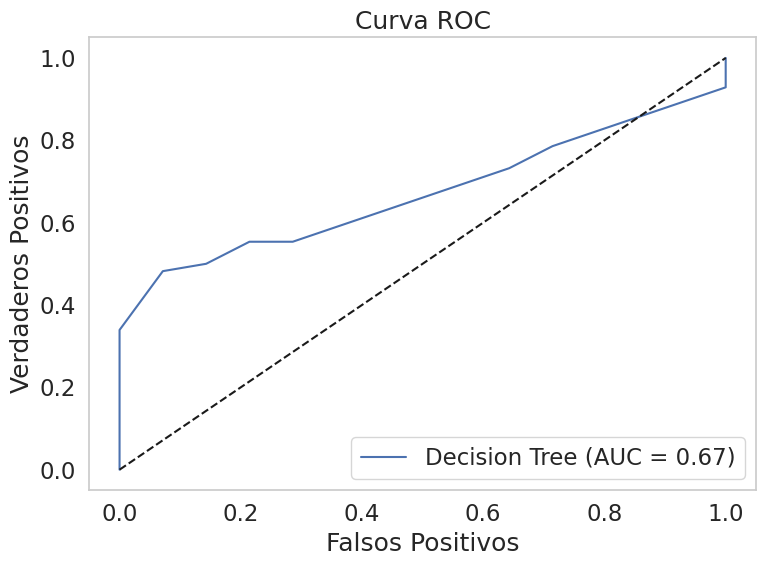

In [457]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(fpr, tpr, label=f'{mejor_modelo_nombre} (AUC = %0.2f)' % roc_auc)
ax.plot([0, 1], [0, 1], 'k--')
ax.set_xlabel('Falsos Positivos')
ax.set_ylabel('Verdaderos Positivos')
ax.set_title('Curva ROC')
ax.legend(loc='lower right')
ax.grid()
plt.tight_layout()
plt.show()

<ipython-input-458-1950d90e699e>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(auc_scores.keys()), y=list(auc_scores.values()), palette="mako")


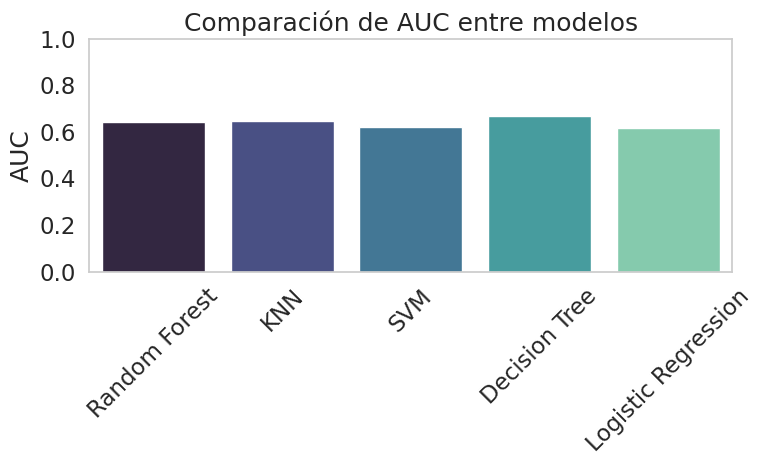

In [458]:
auc_scores = {}

for nombre, modelo in {
    'Random Forest': model_rf,
    'KNN': model_knn,
    'SVM': model_svm,
    'Decision Tree': model_dt,
    'Logistic Regression': model_lr
}.items():
    try:
        if hasattr(modelo, "predict_proba"):
            probas = modelo.predict_proba(X_test_scaled if nombre in ['KNN', 'SVM', 'Logistic Regression'] else X_test)[:, 1]
        else:
            probas = modelo.decision_function(X_test_scaled)
        auc_scores[nombre] = roc_auc_score(y_test, probas)
    except:
        auc_scores[nombre] = np.nan

# Gráfico
plt.figure(figsize=(8, 5))
sns.barplot(x=list(auc_scores.keys()), y=list(auc_scores.values()), palette="mako")
plt.ylabel("AUC")
plt.ylim(0, 1)
plt.title("Comparación de AUC entre modelos")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


### Evaluación del Modelo con el Conjunto de Prueba

In [459]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [460]:
df2=pd.read_csv('prestamos_2.csv')
df2.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [461]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(df["loan_status"])

df2["loan_status_encoded"] = le.transform(df2["loan_status"])
y_test = df2["loan_status_encoded"]


In [462]:
df2['effective_date'] = pd.to_datetime(df2['effective_date'])
df2['due_date'] = pd.to_datetime(df2['due_date'])
df2['loan_duration'] = (df2['due_date'] - df2['effective_date']).dt.days
df2['dayofweek'] = df2['effective_date'].dt.dayofweek

In [463]:
df2 = pd.get_dummies(df2, columns=['education'], drop_first=True)
df2 = pd.get_dummies(df2, columns=['Gender'], drop_first=True)
df2 = pd.get_dummies(df2, columns=['dayofweek'], drop_first=True)

In [464]:
for col in X.columns:
    if col not in df2.columns:
        df2[col] = 0

In [465]:
df2 = df2[X.columns]
X_test = df2[Feature]

In [466]:
y_pred = model_dt.predict(df2)
y_pred_proba = model_dt.predict_proba(df2)[:, 1]

print("Predicciones:", y_pred)
print("Probabilidades:", y_pred_proba)

Predicciones: [1 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 1 0 0 0 0 0 1 0 1 0 1 1]
Probabilidades: [1.         0.         0.35714286 0.35714286 0.63333333 0.57142857
 0.63333333 0.63333333 0.77777778 0.63333333 0.57142857 1.
 0.63333333 0.77777778 0.4516129  0.         0.63333333 1.
 0.8        0.8        0.63333333 0.8        1.         0.97727273
 1.         0.97727273 0.97727273 0.97727273 1.         0.75
 0.97727273 1.         0.75       0.97727273 1.         0.97727273
 1.         0.97727273 1.         0.97727273 0.         0.5
 0.71428571 0.35714286 0.5        0.35714286 0.         0.4516129
 0.63333333 0.4516129  0.63333333 0.4516129  0.57142857 1.        ]


In [467]:
print("df2 shape:", df2.shape)
print("y_test shape:", y_test.shape)

df2 = df2[X.columns]

df2 shape: (54, 13)
y_test shape: (54,)


In [468]:
from sklearn.metrics import f1_score, roc_auc_score

y_pred = model_dt.predict(df2)
y_proba = model_dt.predict_proba(df2)[:, 1]

f1 = f1_score(y_test, y_pred)
print("F1 Score:", round(f1, 4))

auc = roc_auc_score(y_test, y_proba)
print("AUC:", round(auc, 4))

F1 Score: 0.875
AUC: 0.808


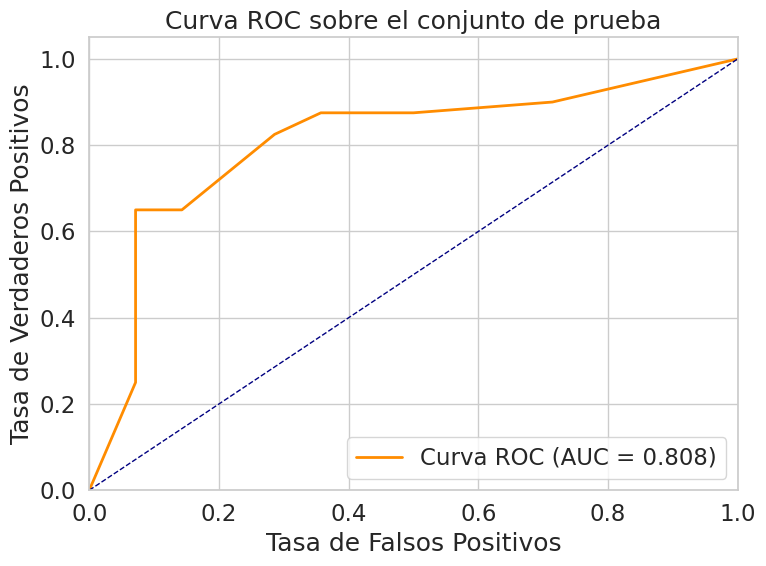

In [470]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_prob = model_dt.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC sobre el conjunto de prueba')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


#### **Entrada de datos nuevos para predicción:**

In [471]:
import pandas as pd

usuario = pd.DataFrame({
    'Principal': [1000],
    'terms': [30],
    'loan_duration': [30],
    'education_High School or Below': [0],
    'education_Master or Above': [0],
    'education_college': [1],
    'Gender_male': [1],
    'dayofweek_1': [0],
    'dayofweek_2': [0],
    'dayofweek_3': [1],
    'dayofweek_4': [0],
    'dayofweek_5': [0],
    'dayofweek_6': [0]
})

prediccion = model_dt.predict(usuario)
print("¿Pagará el préstamo?", "✅ Sí" if prediccion[0] == 1 else "❌ No")


¿Pagará el préstamo? ✅ Sí


### Código para guardar y cargar el modelo:

In [472]:
import joblib
joblib.dump(model_dt, 'modelo_arbol_decision.pkl')


['modelo_arbol_decision.pkl']

In [473]:
import joblib
model_dt = joblib.load('modelo_arbol_decision.pkl')
